In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier 

from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv('emails.csv')

In [30]:
df=df.drop('Email',axis=1)
print(df.head())

   the  to  ect  and  for  of    a  you  hou  in  ...  connevey  jay  valued  \
0    0   0    1    0    0   0    2    0    0   0  ...         0    0       0   
1    8  13   24    6    6   2  102    1   27  18  ...         0    0       0   
2    0   0    1    0    0   0    8    0    0   4  ...         0    0       0   
3    0   5   22    0    5   1   51    2   10   1  ...         0    0       0   
4    7   6   17    1    5   2   57    0    9   3  ...         0    0       0   

   lay  infrastructure  military  allowing  ff  dry  Prediction  
0    0               0         0         0   0    0           0  
1    0               0         0         0   1    0           0  
2    0               0         0         0   0    0           0  
3    0               0         0         0   0    0           0  
4    0               0         0         0   1    0           0  

[5 rows x 3001 columns]


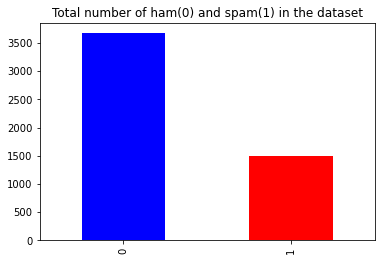

In [20]:
df['Prediction'].value_counts().plot.bar(color = ["b","r"]) 
plt.title('Total number of ham(0) and spam(1) in the dataset')
plt.show()

In [31]:
x_=df.iloc[:,:-1]
normal=StandardScaler()
x_=normal.fit_transform(x_)

pca_var= PCA(n_components=0.95, svd_solver='full')

X_pca = pca_var.fit_transform(x_)
X_pca.shape

(5172, 1063)

In [33]:
min_var = 0.95  # Variance

pca_var= PCA(n_components=min_var, svd_solver='full')

X_pca2 = pca_var.fit(x_)

print('no of componentes:', len(X_pca2.components_))
#print('Ratio of explained variance:')
#print(X_pca2.explained_variance_ratio_)
print(X_pca2)

no of componentes: 1063
PCA(n_components=0.95, svd_solver='full')


In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X_pca,df.iloc[:,-1],test_size=0.3, random_state=4)

# Logistic Regression

In [24]:

model=LogisticRegression()
model.fit(X_train,Y_train)
y_tr_pred=model.predict(X_train)
y_te_pred=model.predict(X_test)
print("accuracy score",accuracy_score(Y_test,y_te_pred))
print("-------------------------------------------------------")
print("classification report")
print(classification_report(Y_test,y_te_pred))
print("-------------------------------------------------------")
print("confusion matrix")
print(confusion_matrix(Y_test,y_te_pred))
print("ROC AUC for Train : ", roc_auc_score(Y_train, y_tr_pred))
print("ROC AUC for Test : ", roc_auc_score(Y_test, y_te_pred))

accuracy score 0.9587628865979382
-------------------------------------------------------
classification report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1093
           1       0.92      0.95      0.93       459

    accuracy                           0.96      1552
   macro avg       0.95      0.96      0.95      1552
weighted avg       0.96      0.96      0.96      1552

-------------------------------------------------------
confusion matrix
[[1053   40]
 [  24  435]]
ROC AUC for Train :  0.9989380718200168
ROC AUC for Test :  0.955557947485185


# KNN Classification

In [34]:
l=[]
for k in range(1,200):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    
    pred=knn.predict(X_test)
    l.append(accuracy_score(Y_test,pred))
#print(l)
print(max(l))
print("k=",l.index(max(l))+1)
print("-------------------------------------------------------")
print("classification report")
print(classification_report(Y_test,y_te_pred))
print("-------------------------------------------------------")
print("confusion matrix")
print(confusion_matrix(Y_test,y_te_pred))

0.9478092783505154
k= 2
-------------------------------------------------------
classification report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1093
           1       0.92      0.95      0.93       459

    accuracy                           0.96      1552
   macro avg       0.95      0.96      0.95      1552
weighted avg       0.96      0.96      0.96      1552

-------------------------------------------------------
confusion matrix
[[1053   40]
 [  24  435]]


# SVM Classification

In [35]:
model=SVC(C=1,kernel='linear',gamma=1)
model.fit(X_train,Y_train)
y_tr_pred=model.predict(X_train)
y_te_pred=model.predict(X_test)
print("accuracy=",accuracy_score(Y_test,pred))
print("-------------------------------------------------------")
print("classification report")
print(classification_report(Y_test,y_te_pred))
print("-------------------------------------------------------")
print("confusion matrix")
print(confusion_matrix(Y_test,pred))
print("ROC AUC for Test : ", roc_auc_score(Y_test, y_te_pred))

accuracy= 0.907860824742268
-------------------------------------------------------
classification report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1093
           1       0.89      0.93      0.91       459

    accuracy                           0.95      1552
   macro avg       0.93      0.94      0.94      1552
weighted avg       0.95      0.95      0.95      1552

-------------------------------------------------------
confusion matrix
[[953 140]
 [  3 456]]
ROC AUC for Test :  0.9439899778148527


# Ada Boost Classifier

In [11]:
model = AdaBoostClassifier(n_estimators=50)
model.fit(X_train,Y_train)
y_tr_pred=model.predict(X_train)
y_te_pred=model.predict(X_test)
print("accuracy score",accuracy_score(Y_test,y_te_pred))
print("-------------------------------------------------------")
print("classification report")
print(classification_report(Y_test,y_te_pred))
print("-------------------------------------------------------")
print("confusion matrix")
print(confusion_matrix(Y_test,y_te_pred))
print("ROC AUC for Train : ", roc_auc_score(Y_train, y_tr_pred))
print("ROC AUC for Test : ", roc_auc_score(Y_test, y_te_pred))

accuracy score 0.9568298969072165
-------------------------------------------------------
classification report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1093
           1       0.91      0.95      0.93       459

    accuracy                           0.96      1552
   macro avg       0.94      0.96      0.95      1552
weighted avg       0.96      0.96      0.96      1552

-------------------------------------------------------
confusion matrix
[[1048   45]
 [  22  437]]
ROC AUC for Train :  0.9805413114645408
ROC AUC for Test :  0.955449314014515


# Random Forest Classifier

In [36]:
model=RandomForestClassifier(n_estimators=15 , random_state=4)
model.fit(X_train,Y_train)
y_tr_pred=model.predict(X_train)
y_te_pred=model.predict(X_test)
print("accuracy score",accuracy_score(Y_test,y_te_pred))
print("-------------------------------------------------------")
print("classification report")
print(classification_report(Y_test,y_te_pred))
print("-------------------------------------------------------")
print("confusion matrix")
print(confusion_matrix(Y_test,y_te_pred))
print("ROC AUC for Test : ", roc_auc_score(Y_test, y_te_pred))

accuracy score 0.9329896907216495
-------------------------------------------------------
classification report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1093
           1       0.91      0.86      0.88       459

    accuracy                           0.93      1552
   macro avg       0.93      0.91      0.92      1552
weighted avg       0.93      0.93      0.93      1552

-------------------------------------------------------
confusion matrix
[[1053   40]
 [  64  395]]
ROC AUC for Test :  0.9119849627357296


# Decision Tree Classification

In [53]:
model=DecisionTreeClassifier(max_depth=5)
model.fit(X_train,Y_train)
y_tr_pred=model.predict(X_train)
y_te_pred=model.predict(X_test)
print("accuracy score",accuracy_score(Y_test,y_te_pred))
print("-------------------------------------------------------")
print("classification report")
print(classification_report(Y_test,y_te_pred))
print("-------------------------------------------------------")
print("confusion matrix")
print(confusion_matrix(Y_test,y_te_pred))


print("ROC AUC for Train : ", roc_auc_score(Y_train, y_tr_pred))
print("ROC AUC for Test : ", roc_auc_score(Y_test, y_te_pred))


path=model.cost_complexity_pruning_path(X_train,Y_train)
a=path['ccp_alphas']
#print("alpha_vlues",a)

accuracy score 0.9246134020618557
-------------------------------------------------------
classification report
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1093
           1       0.85      0.90      0.88       459

    accuracy                           0.92      1552
   macro avg       0.90      0.92      0.91      1552
weighted avg       0.93      0.92      0.93      1552

-------------------------------------------------------
confusion matrix
[[1020   73]
 [  44  415]]
ROC AUC for Train :  0.9574740784858417
ROC AUC for Test :  0.9186753892367153


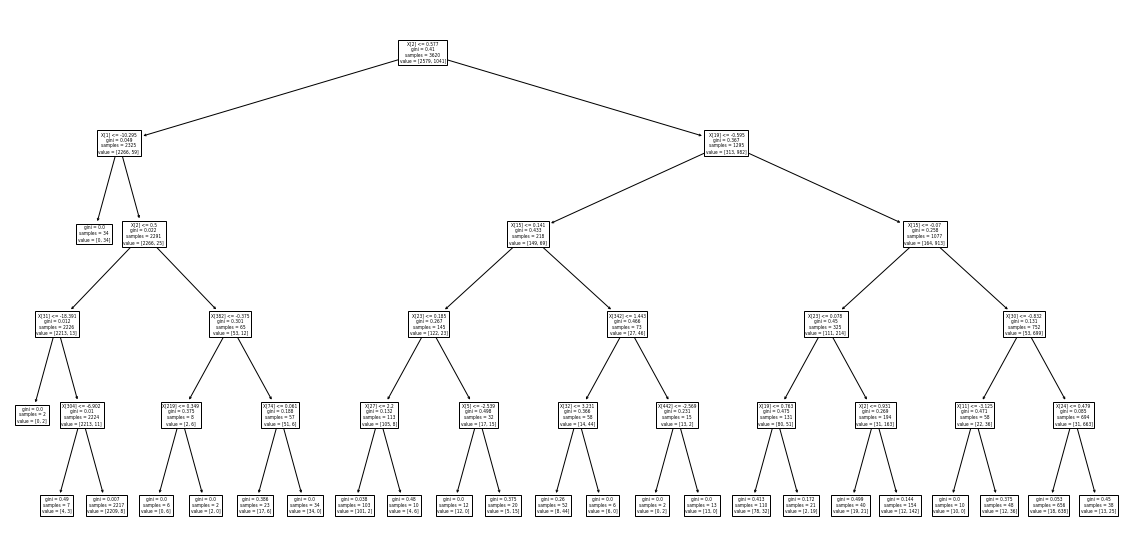

In [54]:
plt.figure(figsize=(20,10))
tree.plot_tree(model)
plt.show()